<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Possum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [3]:
!kaggle datasets download -d abrambeyer/openintro-possum

  0% 0.00/2.15k [00:00<?, ?B/s]
100% 2.15k/2.15k [00:00<00:00, 1.03MB/s]


In [4]:
!unzip '/content/openintro-possum.zip' && rm '/content/openintro-possum.zip'

Archive:  /content/openintro-possum.zip
  inflating: possum.csv              


In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px 
plt.style.use('fivethirtyeight')

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [7]:
data=data.dropna()

In [8]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [10]:
pie = data.groupby(['age'])['case'].count()

Text(0.5, 1.0, 'Possum´s Age')

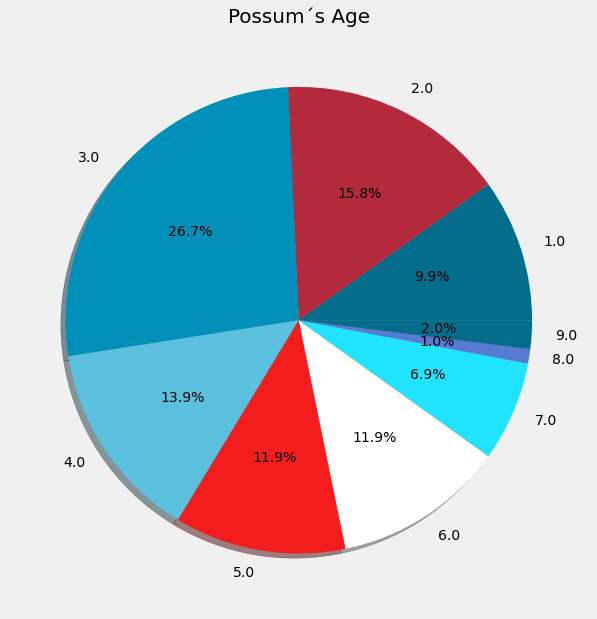

In [11]:
colors = ['#046d8b','#b42a3d','#0190ba','#5bc0de', '#f41d1d',	'#ffffff','#20e3ff','#597ad4']
plt.figure(figsize=(10,10))
plt.pie(pie.values,labels=pie.index, shadow=True, autopct='%.1f%%',colors=colors )
plt.title("Possum´s Age",fontsize=20)

Text(0.5, 1.0, 'Find correlation between variables')

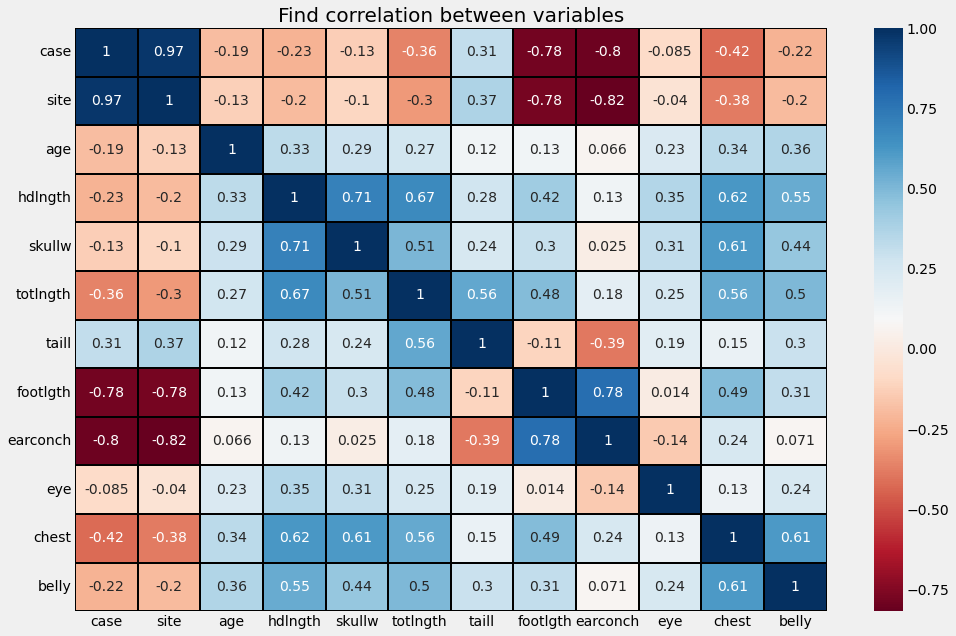

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),linecolor='black',linewidths=2,annot=True, cmap='RdBu')
plt.title("Find correlation between variables", fontsize=20)

# **MACHINE LEARNING MODELS**

In [13]:
x = np.array(data[['hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']])
y = np.array(data['age'])

In [14]:
print("x:",x.shape,"y:",y.shape)

x: (101, 9) y: (101,)


In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=42)

In [16]:
print('x_train: ', x_train.shape,'y_train: ',y_train.shape)

x_train:  (80, 9) y_train:  (80,)


In [17]:
from sklearn.linear_model import LinearRegression

#features 'hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly'

features = np.array([[85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5]])

rl = LinearRegression()
rl.fit(x_train,y_train)
lr = rl.predict(features)
lr

array([2.06182932])

In [24]:
print(np.round(rl.score(x_test,y_test),2)*100,"%")

2.0 %


In [18]:
from sklearn.ensemble import RandomForestRegressor

#features 'hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly'

features = np.array([[85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5]])

rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rfr = rf.predict(features)
rfr

array([1.26])

In [25]:
print(np.round(rf.score(x_test,y_test),2)*100,"%")

33.0 %


In [19]:
from sklearn.svm import SVR

#features 'hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly'

features = np.array([[85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5]])

rs = SVR()
rs.fit(x_train,y_train)
SvR = rs.predict(features) 
SvR

array([2.89449402])

In [26]:
print(np.round(rs.score(x_test,y_test),2)*100,"%")

-8.0 %


In [20]:
from sklearn.neighbors import KNeighborsRegressor

#features 'hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly'

features = np.array([[85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5]])

rk = KNeighborsRegressor()
rk.fit(x_train,y_train)
knr = rk.predict(features)
knr

array([1.4])

In [27]:
print(np.round(rk.score(x_test,y_test),2)*100,"%")

15.0 %


In [21]:
data.iloc[75,]

case           79
site            6
Pop         other
sex             m
age           1.0
hdlngth      85.8
skullw       50.0
totlngth     81.0
taill        36.5
footlgth     62.8
earconch     43.0
eye          14.8
chest        22.0
belly        28.5
Name: 78, dtype: object